# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link : https://www.youtube.com/watch?v=-480Twomrvk


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [136]:
import pandas as pd

file_path = '/Users/yashbhatia/Downloads/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (2) (2).csv'
zillow_data = pd.read_csv(file_path)

zillow_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23
0,112345,0,Maryvale,neighborhood,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,68745.13354,...,3.440022e+05,3.373810e+05,3.308952e+05,3.256387e+05,3.230082e+05,3.227403e+05,3.240621e+05,3.259543e+05,3.284849e+05,3.315549e+05
1,192689,1,Paradise,neighborhood,NV,NV,Las Vegas,"Las Vegas-Henderson-Paradise, NV",Clark County,135510.73750,...,3.882225e+05,3.822690e+05,3.763474e+05,3.715621e+05,3.681486e+05,3.663270e+05,3.657891e+05,3.665221e+05,3.683572e+05,3.712951e+05
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,396099.35130,...,1.447533e+06,1.410143e+06,1.372069e+06,1.340776e+06,1.319392e+06,1.305069e+06,1.298354e+06,1.292493e+06,1.286160e+06,1.276332e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,649184.30200,...,1.469195e+06,1.431539e+06,1.385162e+06,1.339981e+06,1.308153e+06,1.289060e+06,1.279811e+06,1.274151e+06,1.269737e+06,1.265209e+06
4,118208,4,South Los Angeles,neighborhood,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,128977.53240,...,6.585249e+05,6.568486e+05,6.504251e+05,6.398328e+05,6.294684e+05,6.252059e+05,6.261762e+05,6.299090e+05,6.371777e+05,6.469201e+05


In [137]:
def data_parser(zillow_data):
    # missing values for 'City' and 'Metro'
    zillow_data['City'].fillna('Unknown', inplace=True)
    zillow_data['Metro'].fillna('Unknown', inplace=True)

    # missing values in the monthly data replaced with mean of each column 
    for column in zillow_data.columns[9:]: #9th column is the one after which we have monthly data
        zillow_data[column].fillna(zillow_data[column].mean(), inplace=True)

    # Converting to date time objects 
    for column in zillow_data.columns[9:]:
        # Renaming the columns to a 'YYYY-MM-DD' format 
        new_column_name = pd.to_datetime(column).strftime('%Y-%m-%d')
        zillow_data.rename(columns={column: new_column_name}, inplace=True)
    
    # Filtering the dataset New York
    nyc_data = zillow_data[zillow_data['City'] == 'New York']

    return nyc_data
    output_file_path = '/Users/yashbhatia/Desktop/CS2316/cleaned_nyc_datazillow.csv'
    cleaned_nyc_data.to_csv(output_file_path, index=False)

original_zillow_data = pd.read_csv(file_path)


# Call the data_parser function and get the cleaned NYC data
cleaned_nyc_data = data_parser(original_zillow_data)
cleaned_nyc_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,396099.351300,...,1.447533e+06,1.410143e+06,1.372069e+06,1.340776e+06,1.319392e+06,1.305069e+06,1.298354e+06,1.292493e+06,1.286160e+06,1.276332e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,649184.302000,...,1.469195e+06,1.431539e+06,1.385162e+06,1.339981e+06,1.308153e+06,1.289060e+06,1.279811e+06,1.274151e+06,1.269737e+06,1.265209e+06
6,194430,6,East New York,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,152678.455200,...,5.891099e+05,5.878800e+05,5.854108e+05,5.819406e+05,5.793061e+05,5.827817e+05,5.898563e+05,5.955220e+05,5.981793e+05,5.991795e+05
7,272902,7,Bedford-Stuyvesant,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,134811.547100,...,9.690718e+05,9.677918e+05,9.651336e+05,9.578281e+05,9.482006e+05,9.437601e+05,9.466823e+05,9.504100e+05,9.532425e+05,9.536458e+05
11,198687,11,Washington Heights,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,199281.963000,...,6.308144e+05,6.171039e+05,6.005089e+05,5.833579e+05,5.688194e+05,5.570808e+05,5.497453e+05,5.437256e+05,5.381410e+05,5.333112e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,272982,8005,Travis,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Richmond County,146976.830600,...,6.217286e+05,6.216627e+05,6.213157e+05,6.208388e+05,6.215552e+05,6.246285e+05,6.283938e+05,6.311465e+05,6.323363e+05,6.329952e+05
7672,403199,8163,Grasmere,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Richmond County,263173.021700,...,7.671179e+05,7.649646e+05,7.623394e+05,7.603218e+05,7.601317e+05,7.627998e+05,7.635314e+05,7.628863e+05,7.616820e+05,7.616958e+05
9857,10562,10792,Broad Channel,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,162340.894296,...,5.387485e+05,5.363070e+05,5.332222e+05,5.312189e+05,5.295186e+05,5.302627e+05,5.322586e+05,5.348005e+05,5.372145e+05,5.381068e+05
13029,270870,14753,Lighthouse Hill,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Richmond County,310763.452400,...,1.092686e+06,1.097312e+06,1.102986e+06,1.106664e+06,1.106873e+06,1.108887e+06,1.111599e+06,1.115518e+06,1.117850e+06,1.118887e+06


In [138]:
nyc_housing_data = cleaned_nyc_data
borough_mapping = {
        'Manhattan': ['Upper West Side', 'Upper East Side', 'Harlem', 'Washington Heights', 'Chelsea', 'Greenwich Village', 'East Harlem'],
        'Brooklyn': ['East New York', 'Bedford-Stuyvesant', 'Williamsburg', 'Crown Heights', 'Borough Park', 'Bushwick', 'Sheepshead Bay', 'Flatbush'],
        'Queens': ['Flushing', 'Astoria', 'Elmhurst', 'Jackson Heights', 'Forest Hills'],
        'The Bronx': ['Riverdale', 'Fordham', 'Concourse', 'Kingsbridge'],
        'Staten Island': ['St. George', 'Tottenville', 'Great Kills']
    }

housing_price_columns = nyc_housing_data.columns[9:]

## Web Collection Requirement \#1


In [139]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def web_parser1():
    url = "https://en.wikipedia.org/wiki/List_of_New_York_City_Housing_Authority_properties"
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")
    final_list = []
    table = soup.find_all(class_="wikitable sortable")

    for each in table:
        rows = each.find("tbody").find_all("tr")[1:]
        for row in rows:
            cells = row.find_all("td")
            dates = re.findall(r'\b\d{4}\b', cells[5].text)
            neighborhood = cells[1].text.strip()  
            if dates:
                dates = [int(year) for year in dates]
                mean_year = sum(dates) / len(dates)
                final_list.append((neighborhood, mean_year))
                
    df = pd.DataFrame(final_list, columns=['Neighborhood Name', 'Mean Year Established'])
    # Group by neighborhood and get mean of year established
    df2 = df.groupby(['Neighborhood Name'])['Mean Year Established'].mean().reset_index()
    df2['Mean Year Established'] = df['Mean Year Established'].astype(int)

    df2.to_csv('webscrapeddatawiki.csv', index=False)
    return df2
    

# Function Call
df2 =web_parser1()
df2

,Neighborhood Name,Mean Year Established
0,Allerton,1950
1,Arverne,1962
2,Astoria,1974
3,Bedford-Stuyvesant,1948
4,Boerum Hill,1977
...,...,...
76,Westchester Square,1963
77,Williamsbridge,1973
78,Williamsburg,1973
79,Woodside,1973


## Web Collection Requirement #2

In [140]:
import requests
import pandas as pd
import json

def get_demographics_data(latitude, longitude):
    base_url = "https://maptile2.org/sp/api6.php"
    params = {
        'fLat': latitude,
        'fLon': longitude,
        'sGeo': 'county',
        'iPolygon': '1',
    }
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

# Define coordinates for the 5 boroughs of NYC
boroughs_coordinates = {
    'Manhattan': (40.776677, -73.97132),
    'Bronx': (40.83, -73.87),
    'Brooklyn': (40.65, -73.95),
    'Queens': (40.7282, -73.79),
    'Staten Island': (40.579021, -74.151535)
}

# Initialize an empty list to store the data for each borough
boroughs_data = []

# Loop through each borough and retrieve demographics data
for borough, (latitude, longitude) in boroughs_coordinates.items():
    data = get_demographics_data(latitude, longitude)
    if data:
        demographics_data = {
            'Borough': borough,
            'Asian': data['asian'],
            'Black': data['black'],
            'Hispanic': data['hispanic'],
            'Indian': data['indian'],
            'Island': data['island'],
            'Multi': data['multi'],
            'White': data['white'],
            'Population': data['pop'],
            'Median Income': data['income'],
        }
        boroughs_data.append(demographics_data)

# Create a DataFrame from the list of boroughs' demographics data
boroughs_df = pd.DataFrame(boroughs_data)

# Specify the output CSV file path
output_file_path = '/Users/yashbhatia/Desktop/CS2316/demographics_data.csv'

# Export the DataFrame to a CSV file
boroughs_df.to_csv(output_file_path, index=False)

# Print the DataFrame
boroughs_df

,Borough,Asian,Black,Hispanic,Indian,Island,Multi,White,Population,Median Income
0,Manhattan,13.1028,13.5376,23.7651,0.588402,0.105947,10.3551,46.8227,1694251,89812
1,Bronx,4.72338,33.0776,54.7626,1.4626,0.111364,13.0494,8.88165,1472654,41895
2,Brooklyn,13.6575,28.2174,18.8747,0.752831,0.0543479,8.67297,35.3948,2736074,63973
3,Queens,27.4638,16.7567,27.7643,1.26849,0.0714207,10.1171,22.8379,2405464,72028
4,Staten Island,11.9575,10.4971,19.5584,0.725975,0.0472015,7.83061,56.0732,495747,85381


In [6]:
air_quality_file_path = '/Users/yashbhatia/Downloads/Air_Quality (2).csv'
air_quality_data = pd.read_csv(air_quality_file_path)


air_quality_data.head()

def extra_source1():
    air_quality_missing_values = air_quality_data.isnull().sum()
    air_quality_data_types = air_quality_data.dtypes
    
    ## converting to datetime format to handle inconsistencies
    air_quality_data['Start_Date'] = pd.to_datetime(air_quality_data['Start_Date']) 
    
    geo_place_names = air_quality_data['Geo Place Name'].unique()
    
    # Getting year from 'Start_Date' column 
    air_quality_data['Year'] = air_quality_data['Start_Date'].dt.year

    # Grouping by Geo Place Name and Year and then calculating the mean 'Data Value' (this is the pollution level) for each group
    air_quality_annual_mean = air_quality_data.groupby(['Geo Place Name', 'Year'])['Data Value'].mean().reset_index()

# Zillow data has monthly values, we are creating an annual average for each neighborhood in NYC because we want to look at the effect of air quality on home prices from the zillow dataset
# Extracting year from the datetime columns
    zillow_years = [column for column in cleaned_nyc_data.columns if column.endswith('-31')]
    zillow_annual_mean = cleaned_nyc_data.melt(id_vars=['RegionName'], value_vars=zillow_years)
    zillow_annual_mean['Year'] = zillow_annual_mean['variable'].str[:4].astype(int)
    zillow_annual_mean.drop('variable', axis=1, inplace=True)
    zillow_annual_mean = zillow_annual_mean.groupby(['RegionName', 'Year'])['value'].mean().reset_index()

# Joining on Year and neibhorhoood age 
    air_quality_zillow_joined = pd.merge(
        zillow_annual_mean,
        air_quality_annual_mean,
        left_on=['RegionName', 'Year'],
        right_on=['Geo Place Name', 'Year'],
        how='inner')

    df2 = air_quality_zillow_joined
    output_file_path = '/Users/yashbhatia/Desktop/CS2316/airqualitymerged.csv'
    df2.to_csv(output_file_path, index=False)
    return df2
    
############ Function Call ############
extra_source1()

,RegionName,Year,value,Geo Place Name,Data Value
0,Borough Park,2005,538496.879143,Borough Park,15.073333
1,Borough Park,2008,612198.548071,Borough Park,19.325000
2,Borough Park,2009,581083.361757,Borough Park,18.416154
3,Borough Park,2010,572146.696329,Borough Park,19.987143
4,Borough Park,2011,575085.482286,Borough Park,15.856250
...,...,...,...,...,...
175,Willowbrook,2017,485253.794843,Willowbrook,13.554286
176,Willowbrook,2018,539398.489843,Willowbrook,12.781429
177,Willowbrook,2019,562048.649257,Willowbrook,12.875714
178,Willowbrook,2020,564230.185929,Willowbrook,12.135714


## Inconsistencies

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. <b>Missing Values </b>: The significance of missing values in a dataset is that they can indicate incomplete data collection or data entry errors, which may lead to biased or incorrect analyses if not handled properly. For the first dataset that was downloaded from zillow, we identified missing values using the isnull().sum() method, which provides a count of NaN values in each column. To handle these, you filled missing 'City' and 'Metro' values with 'Unknown' and replaced missing values in monthly data columns with the mean of each column.


2. <b> Date Formatting Consistency </b>: Date columns need to be in a consistent format to enable correct parsing and analysis of temporal data. We identified inconsistencies in data formatting for both the zillow dataset and the air quality dataset which is our additional dataset that we downloaded. Since we plan on merging these two datasets we needed the date formatting to be conistent to aboid any error. We inspected the columns containing dates and handled this by converting these columns to datetime objects and renaming them to a 'YYY-MM-DD' format. This will ensure uniformity and helped us when we calcuated the mean air quality every year for every neighborhood in NYC while joining the two datasets.

3. <b> Removing supercript and getting only 'Year' </b>: On the Wikipedia page in the 'Date of Completion' column contains strings and columns and are differently formatted for different rows. Another inconsistency within this column was that some dates had the superscript [5] in it to denote its citation, however this inconsistency would make our analysis harder, therefore we used regex to deal with this inconsistency by just selecting the Year from that column. We identified this inconsistency by looking over the 5 tables that are in our wikipage since there were a smaller number of rows. 




## Data Sources
Include sources (as links) to your datasets. Add any additional data sources if needed. Clearly indicate if a data source is different from one submitted in your Phase I, as we will check that it satisfies the requirements.
*   Downloaded Dataset Source:https://www.zillow.com/research/data/
*   Web Collection #1 Source:https://en.wikipedia.org/wiki/List_of_New_York_City_Housing_Authority_properties
*   Web Collection #2 Source:https://www.justicemap.org/ (For this website we contacted the owner Aaron since the orignal API link wasn't working and he sent us an updated link which is as follows: https://maptile2.org/sp/api6.php?fLat=40.74&fLon=-74&sGeo=county&sCompare=off&iZoom=4&iPolygon_compare=0&iPolygon=1&iComparedefault=1
    

# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Our project provides a comprehensive analysis of New York City's housing market, focusing on price volatility, demographic correlations, and the impact of external factors like air quality on real estate values. It utilizes diverse data sources, including web-collected and downloaded datasets, to examine trends and make predictions for future housing prices in the city's most fluctuating boroughs. We are excited about the New York City Housing Market because we plan on moving here after college

## Insights & Visualizations

### Insight 1: Price Trend Analyis: Which Borough's housing market has been the most volatile?

Our initial dataset for housing prices encompassed all neighborhoods within New York City, sourced from Zillow. To streamline our project's focus, we made the decision to concentrate on the five boroughs of New York City, namely Manhattan, Brooklyn, Queens, The Bronx, and Staten Island. While each borough comprises numerous distinct neighborhoods, we opted to treat the boroughs as independent entities for the purpose of our analysis.

We mapped individual neighborhoods to the 5 boroughs and then calculated the mean of the housing price columns of the neighborhoods to an individual borough.  

We were interested conducting a Price Trend Analysis to see how the housing market has evolved in each borough from 2000 to 2023. We were also interested in seeing which boroughs have had the highest volatility in their housing prices during this time frame. 

1. Which borough in New York City has had the highest percentage change in housing price? 
2. Which borough has had the highest volatility in its housing prices?

In [141]:
import pandas as pd

def calculate_borough_stats(data, borough_mapping, housing_price_columns):
    def aggregate_by_borough(data, borough_mapping):
        borough_data = {}
        for borough, neighborhoods in borough_mapping.items():
            borough_neighborhoods_data = data[data['RegionName'].isin(neighborhoods)]
            borough_data[borough] = borough_neighborhoods_data[housing_price_columns].mean()
        return borough_data

    borough_housing_data = aggregate_by_borough(data, borough_mapping)

    borough_housing_df = pd.DataFrame(borough_housing_data)
    borough_housing_df.index = pd.to_datetime(borough_housing_df.index)

    borough_stats = {}

    for borough in borough_housing_df.columns:
        borough_data = borough_housing_df[borough]

        percent_change = ((borough_data.iloc[-1] - borough_data.iloc[0]) / borough_data.iloc[0]) * 100

        std_deviation = borough_data.std()

        borough_stats[borough] = {'PercentChange': percent_change, 'Volatility': std_deviation}

    borough_stats_df = pd.DataFrame(borough_stats).T
    return borough_stats_df


borough_stats_df = calculate_borough_stats(nyc_housing_data, borough_mapping, housing_price_columns)
borough_stats_df


,PercentChange,Volatility
Manhattan,174.889486,274818.226690
Brooklyn,361.490200,207884.248283
Queens,196.948845,144259.452360
The Bronx,100.879811,62925.155454
Staten Island,238.064073,120205.075874


### Insight 1 Explanation

Here are the statistical insights for each borough in New York City:

Manhattan:
Percent Change: 174.89% (overall increase in housing prices from 2000 to 2023)
Volatility: $274,818 (indicating the variability in housing prices)

Brooklyn:
Percent Change: 361.49%
Volatility: $207,884

Queens:
Percent Change: 196.95%
Volatility: $144,259

The Bronx:
Percent Change: 100.88%
Volatility: $62,925

Staten Island:
Percent Change: 238.06%
Volatility: $120,205

These insights reveal the following: Brooklyn has seen the highest overall increase in housing prices, more than tripling since 2000.
Manhattan, while having a substantial increase in prices, shows the highest volatility, indicating larger fluctuations in its housing market.
The Bronx has the lowest percentage increase and volatility, suggesting a more stable but slowly growing housing market.
This is very helpful for new investors in the New York City Housing market. 

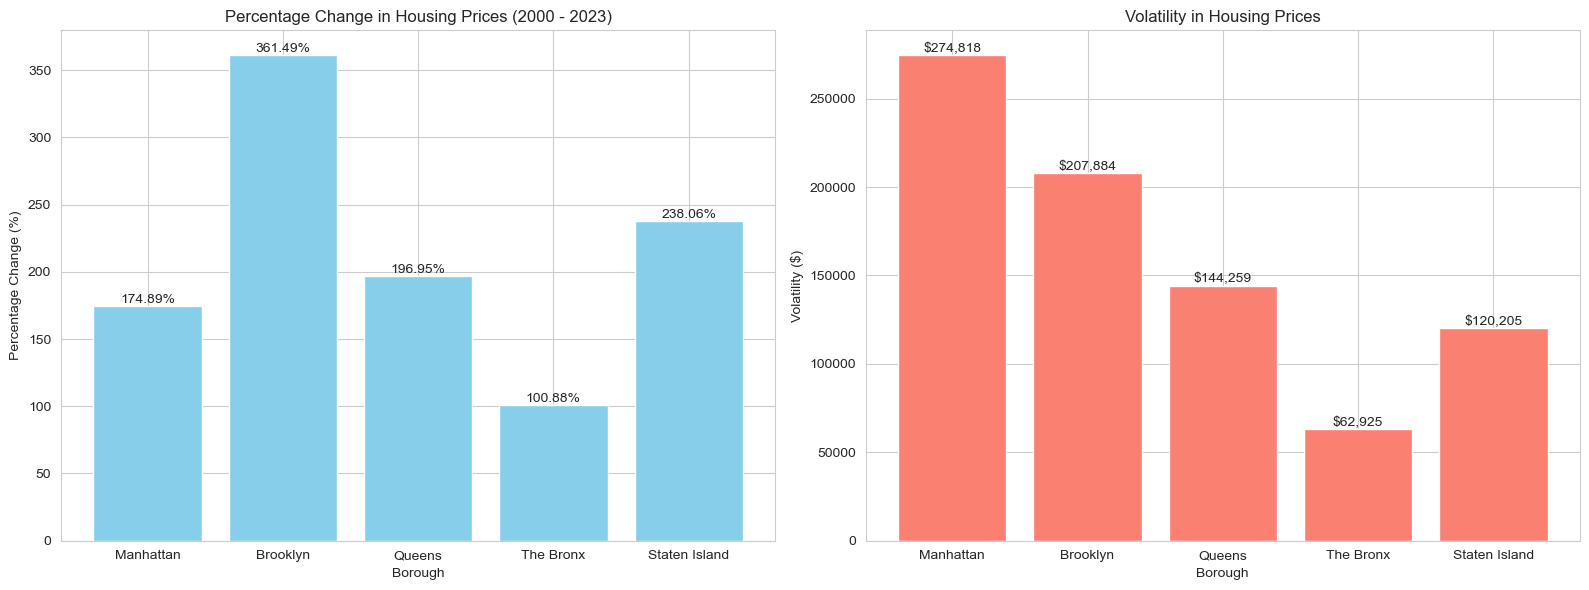

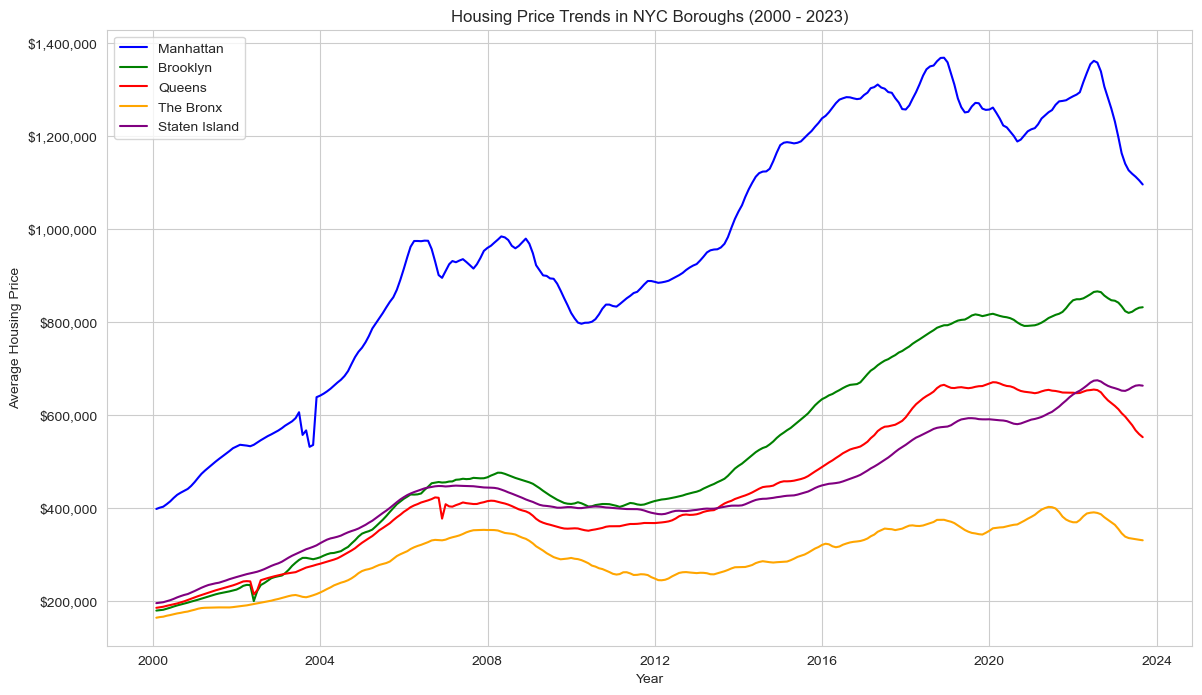

In [142]:
import matplotlib.pyplot as plt

def plot_price_change_and_volatility(borough_stats_df):
    percentage_change = borough_stats_df['PercentChange']
    volatility = borough_stats_df['Volatility']

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].bar(percentage_change.index, percentage_change, color='skyblue')
    ax[0].set_title('Percentage Change in Housing Prices (2000 - 2023)')
    ax[0].set_ylabel('Percentage Change (%)')
    ax[0].set_xlabel('Borough')
    for index, value in enumerate(percentage_change):
        ax[0].text(index, value, f'{value:.2f}%', ha='center', va='bottom')

    ax[1].bar(volatility.index, volatility, color='salmon')
    ax[1].set_title('Volatility in Housing Prices')
    ax[1].set_ylabel('Volatility ($)')
    ax[1].set_xlabel('Borough')
    for index, value in enumerate(volatility):
        ax[1].text(index, value, f'${value:,.0f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
plot_price_change_and_volatility(borough_stats_df)
def aggregate_by_borough(data, borough_mapping):
    borough_data = {}
    for borough, neighborhoods in borough_mapping.items():
        borough_neighborhoods_data = data[data['RegionName'].isin(neighborhoods)]
        borough_data[borough] = borough_neighborhoods_data[housing_price_columns].mean()
    return borough_data

borough_housing_data = aggregate_by_borough(nyc_housing_data, borough_mapping)

borough_housing_df = pd.DataFrame(borough_housing_data)
borough_housing_df.index = pd.to_datetime(borough_housing_df.index)  # Convert index to datetime
def plot_housing_trends(borough_housing_df):
    formatter = FuncFormatter(dollar_formatter)
    plt.figure(figsize=(14, 8))
    borough_colors = ['blue', 'green', 'red', 'orange', 'purple']
    
    for (borough, color) in zip(borough_housing_df.columns, borough_colors):
        plt.plot(borough_housing_df.index, borough_housing_df[borough], label=borough, color=color)
    
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.title('Housing Price Trends in NYC Boroughs (2000 - 2023)')
    plt.xlabel('Year')
    plt.ylabel('Average Housing Price')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_housing_trends(borough_housing_df)


The first two visualizations are bar graphs and help us visualize and support our statistical cliams that we made above in understanding that Brooklyn has had the greatest percentage change of 361.49% and Manhattan's housing market has been the most volatile. 

The bigger line graph below is a great depiction to see how housing price trends have changed for different boroughs differently. We can notice several periods when the houisng market for certain boroughs stayed resilent and how the housing prices for Staten Island have surpassed queens in recent years. 

## Insight 2: Demographics Data Vs Housing Prices 

We have always been curious to see how demographics imapct housing prices of an area. We used an API in which we can input a longitude and latitude and we can retreive data about races and median houshold income of that area. We decided to do input latitude and longitude of the 5 boroughs of NYC and retrieve data on them. The demographics data are from the 2019 conensus and therefore we would need the average home price of the 5 boroughs of 2019. 
- Big question: How does demographics impact housing prices of the 5 boroughs of New York City? What are the correlations between the different race of populations living in an area and housing prices?

In [143]:
borough_mapping = {
    'Manhattan': ['Upper West Side', 'Upper East Side', 'Harlem', 'Washington Heights', 'Chelsea', 'Greenwich Village', 'East Harlem'],
    'Brooklyn': ['East New York', 'Bedford-Stuyvesant', 'Williamsburg', 'Crown Heights', 'Borough Park', 'Bushwick', 'Sheepshead Bay', 'Flatbush'],
    'Queens': ['Flushing', 'Astoria', 'Elmhurst', 'Jackson Heights', 'Forest Hills'],
    'Bronx': ['Riverdale', 'Fordham', 'Concourse', 'Kingsbridge'],
    'Staten Island': ['St. George', 'Tottenville', 'Great Kills']
}
housing_price_columns_2019 = [col for col in cleaned_nyc_data.columns if "2019" in col]
borough_housing_prices_2019 = {}
for borough, neighborhoods in borough_mapping.items():
    borough_data = cleaned_nyc_data[cleaned_nyc_data['RegionName'].isin(neighborhoods)]
    borough_housing_prices_2019[borough] = borough_data[housing_price_columns_2019].mean().mean()

borough_housing_prices_df = pd.DataFrame.from_dict(borough_housing_prices_2019, orient='index', columns=['AverageHousingPrice2019'])
borough_housing_prices_df.reset_index(inplace=True)
borough_housing_prices_df.rename(columns={'index': 'Borough'}, inplace=True)
merged_data = pd.merge(borough_housing_prices_df, boroughs_df, on="Borough")
merged_data
melted_data = merged_data.melt(id_vars=['Borough', 'AverageHousingPrice2019'], value_vars=['Asian', 'Black', 'Hispanic', 'White'])

### Insight 2 Explanation: Demographics Vs Housing Data (Correlation Matrix)

Key Observations:
- Housing Prices and Median Income: There is a strong positive correlation between housing prices and median income, indicating that higher median incomes are typically associated with higher housing prices.

- Housing Prices and Racial Demographics: The correlations between housing prices and the percentages of different racial groups show varied strengths and directions. For example, there is a positive correlation with the percentage of the White population and Asian population, while there are negative correlations with other groups such as Hispanic, Indian, Island, Multi and Black with Indian population having the strongest negative correlation with Average Housing Price in 2019.

- These correlations provide insights into how demographic makeup might relate to housing prices, though it's crucial to remember that correlation does not imply causation.


To better understand our results we could use two visualizations:
1. Heatmap 
2. Individual Bar Charts for Racial Composition by Borough and Average Housing Price in 2019 by Borough

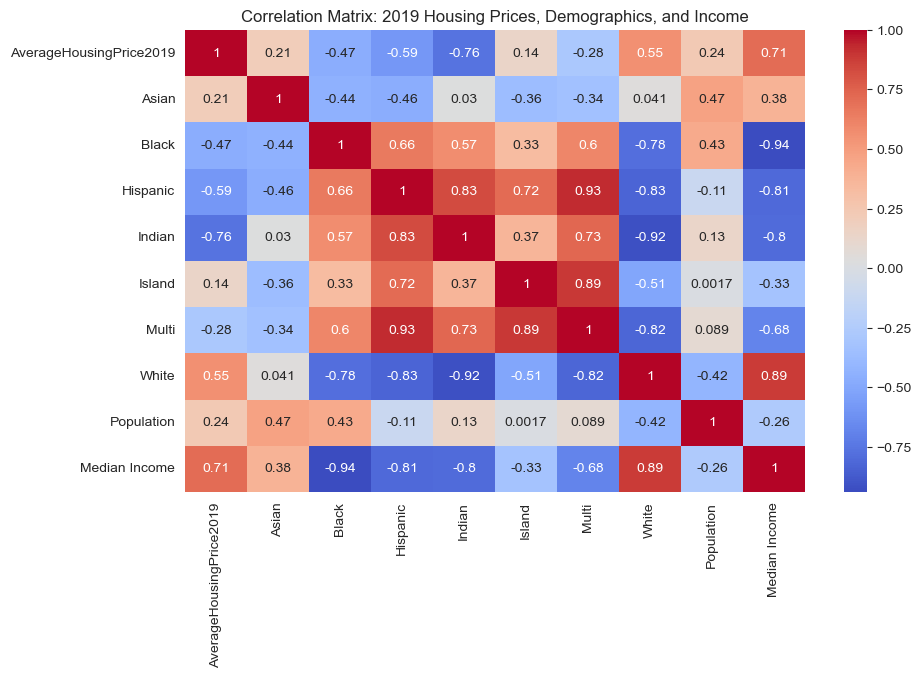

In [144]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2019, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: 2019 Housing Prices, Demographics, and Income")
plt.show()

The Heatmap above may be confusing to read initially but provides a comprehensive correlation analyis of every demographic variable and its correlation with the Average Housing Price of all 5 Boroughs in 2019.

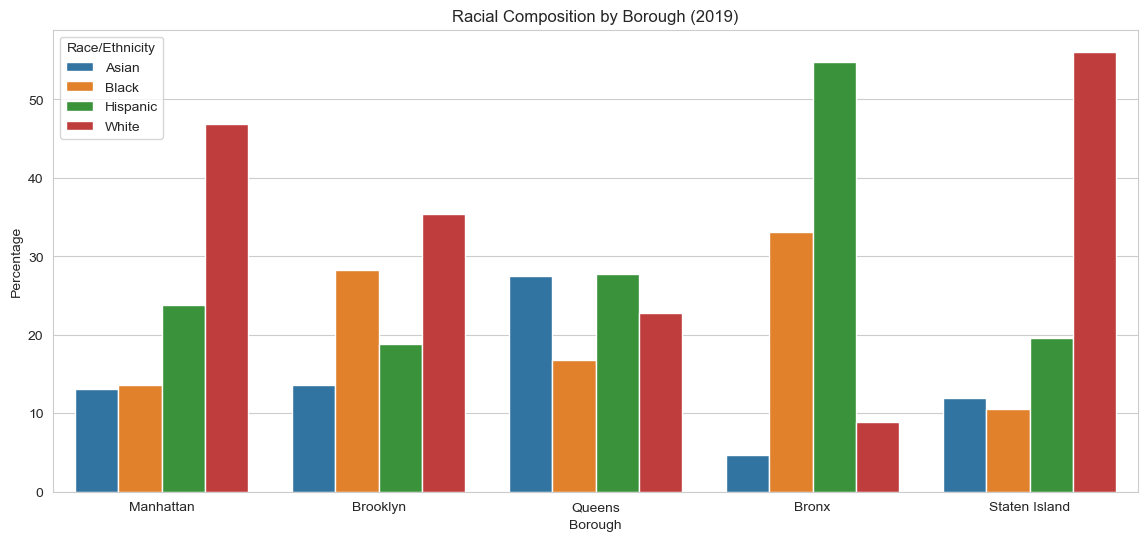

In [145]:
melted_data['value'] = pd.to_numeric(melted_data['value'], errors='coerce')
melted_data = melted_data.dropna()
plt.figure(figsize=(14, 6))
sns.barplot(x='Borough', y='value', hue='variable', data=melted_data)
plt.title("Racial Composition by Borough (2019)")
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.legend(title="Race/Ethnicity")
plt.show()

The Bar Plot above gives us a good understanding of the Demographics by Percentage of every Race/Ethnicity in the different boroughs of New York City in 20219 

### Insight 3 Explanation: Age of Neighborhod vs  Current Price of its Real Estate (2023)

- Question: How does the establishment year of a neighborhood in New York City impact its current real estate market prices?


Correlation Coefficient: 0.2237541218739322


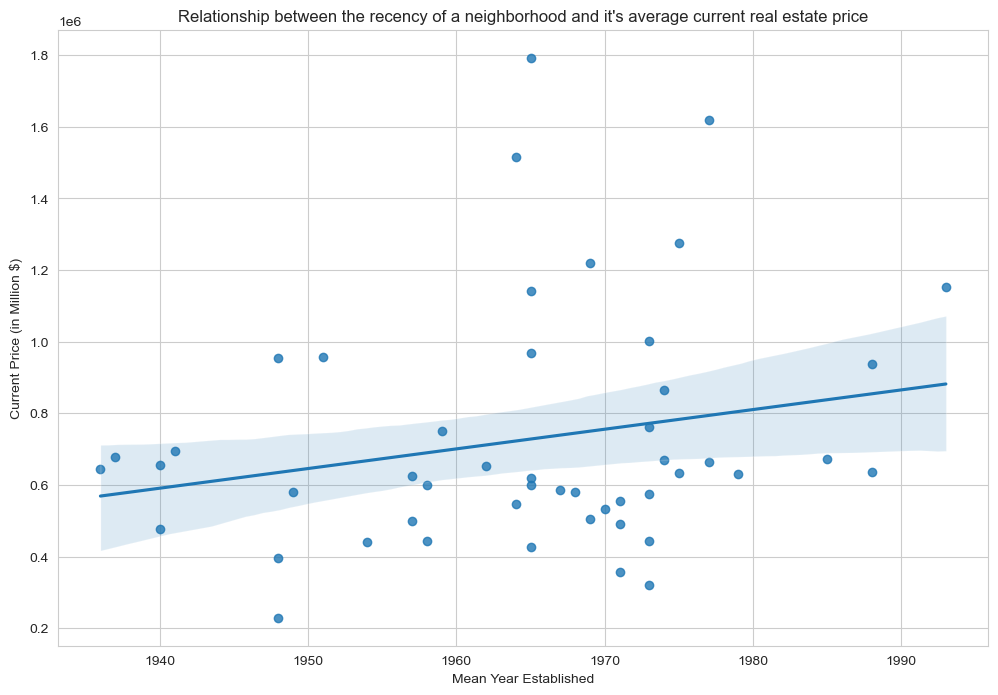

In [146]:
import pandas as pd

year_info_df = df2
pricing_info_df = cleaned_nyc_data

common_neighborhoods = set(year_info_df['Neighborhood Name']).intersection(pricing_info_df['RegionName'])

new_data = {'Neighborhood Name': [],
            'Mean Year Established': [],
            'Current Price': []}

for neighborhood in common_neighborhoods:
    mean_year_established = year_info_df.loc[year_info_df['Neighborhood Name'] == neighborhood, 'Mean Year Established'].values[0]
    pricing = pricing_info_df.loc[pricing_info_df['RegionName'] == neighborhood].iloc[:, -1].values[0]

    new_data['Neighborhood Name'].append(neighborhood)
    new_data['Mean Year Established'].append(mean_year_established)
    new_data['Current Price'].append(pricing)
new_df = pd.DataFrame(new_data)
new_df = new_df.sort_values(by='Mean Year Established').reset_index()[['Neighborhood Name','Mean Year Established','Current Price']]

new_df.to_csv('insight1.csv', index=False)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def visualization1():
    df = pd.read_csv('insight1.csv')
    correlation_coefficient1 = df['Mean Year Established'].corr(df['Current Price'])
    print(f'Correlation Coefficient: {correlation_coefficient1}')
    plt.figure(figsize=(12, 8))
    sns.regplot(x='Mean Year Established', y='Current Price', data=df)
    plt.title("Relationship between the recency of a neighborhood and it's average current real estate price")
    plt.xlabel('Mean Year Established')
    plt.ylabel('Current Price (in Million $)')
    plt.grid(True)
    plt.show()
visualization1()

- Insight: Our study, leveraging data from two comprehensive datasets, reveals a noteworthy trend in New York City's real estate market. We observed a positive correlation of +0.20 between the mean year of establishment of neighborhoods and their current real estate prices. This indicates that, on average, newer neighborhoods tend to have higher real estate values compared to older ones. This finding provides a valuable lens to understand how the historical development of a neighborhood influences its current market appeal and pricing dynamics. By integrating the establishment year of neighborhoods with their current market prices, this analysis offers a nuanced view of the interplay between a neighborhood's history and its present-day economic status, enriching our understanding of New York City's evolving real estate landscape.

### Insight 4 Explanation: Exploring the Relationship between Air Quality and Housing Prices in New York City Neighborhoods: A Correlational Analysis

Our Hyothesis is that the more polluted a neighborhoood is, the lower the housing price of that neighborhood. 

Pearson Correlation Coefficient: -0.06410203054229097


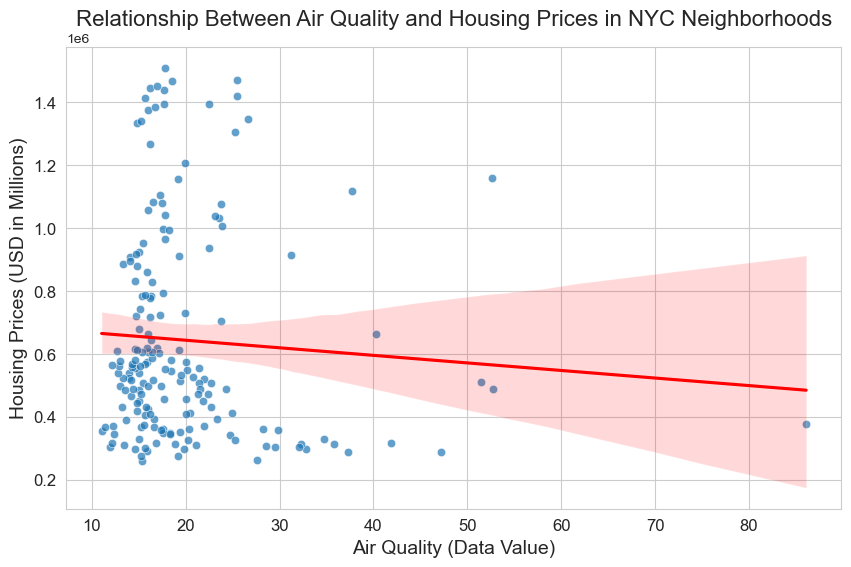

In [147]:
def analyze_air_quality_housing_relationship(file_path):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    
    merged_data = pd.read_csv(file_path)
    correlation = merged_data['Data Value'].corr(merged_data['value']) # Calculate the Pearson correlation coefficient
    print(f"Pearson Correlation Coefficient: {correlation}")

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data, x='Data Value', y='value', alpha=0.7)
    sns.regplot(data=merged_data, x='Data Value', y='value', scatter=False, color='red')
    plt.title('Relationship Between Air Quality and Housing Prices in NYC Neighborhoods', fontsize=16)
    plt.xlabel('Air Quality (Data Value)', fontsize=14)
    plt.ylabel('Housing Prices (USD in Millions)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()
analyze_air_quality_housing_relationship('/Users/yashbhatia/Desktop/CS2316/airqualitymerged.csv')

- Key Insights: Weak Negative Correlation Identified: The analysis revealed a Pearson correlation coefficient of approximately -0.064 between air quality and housing prices, indicating a very weak negative relationship. This suggests that while there is a slight tendency for housing prices to decrease as air quality worsens, the effect is minimal.

- Limited Impact of Air Quality on Housing Prices: The weak correlation implies that air quality, as measured in this dataset, may not be a significant factor influencing housing prices in New York City neighborhoods. This could be due to the overriding impact of other variables like location, amenities, neighborhood desirability, and economic factors.

- Complexity of Housing Market Dynamics: The findings highlight the complexity of the housing market, where numerous factors interplay to determine prices. Air quality, while an important environmental concern, appears to have a limited direct linear impact on housing values in the context of this analysis.

### Insight 5 Explanation: Predicting Housing Prices in the Top 3 most Volatile Boroughs of New York City: Manhattan, Queens, Brooklyn for 2024

We are now performing a predicitive analysis on the different boroughs to see where housing prices are headed compared to previous years using the AutoRegressive Integrated Moving Average model (ARIMA). This is well suited for datasets that show trends and seasonality. This would also help people who are planning on investing in new york city to decide which borough to invest in. 

Just a quick breakdown on how the model works: 
- ARIMA is a statistical analyis  model used for time series forecasting. It is a blend of AutoRegressive (AR), Integrated (I), and Moving Average (MA) components.

- Stationarity Check: We had to check if our time series data is stationary or not becauset the data has to be stationary (p value of less than 0.05) for the ARIMA model to work. We used the Dickey-Fuller test to calcualte the p_value to check for stationarity. Since none of the time series data we had to use differencing on each one of them.

- Once we used differenceing we used the ARIMA model with the ARIMA parameters (p, d, q): p: The number of lag observations in the model (AR part). d: The degree of differencing required to make the time series stationary (I part). q: The size of the moving average window (MA part). We took all the ARIMA parameters as 1,1,1 since our data initially was non-stationary and we differenced all of them. This justifies our choice for the parametes.

- NOTE: Our ARIMA analyis was a simplified analyis just given our knowledge and scope of this class. This could indicate a direction of future prices but will require further statistical machine learning models to refine the predicitions

In [148]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
manhattan_data = borough_housing_df['Manhattan']
brooklyn_data = borough_housing_df['Brooklyn']
Queens_data = borough_housing_df['Queens']

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    return p_value

# Checking if the Manhattan data is stationary
p_value1 = check_stationarity(manhattan_data)
p_value2 = check_stationarity(brooklyn_data)
p_value3 = check_stationarity(Queens_data)
p_value4 = check_stationarity(Bronx_data)
p_value5 = check_stationarity(Staten_data)

# Displaying the p-value
print(p_value1)
print(p_value2)
print(p_value3)


0.2724477451726762
0.7846051604227302
0.4199690225161504


Since they are all non-stationary we use differencing to make them stationary: 

### Predictions for Manhattan

In [149]:
# Differencing the data to achieve stationarity
manhattan_diff = manhattan_data.diff().dropna()
p_value_diff = check_stationarity(manhattan_diff) # Rechecking stationarity after differencing
p_value_diff

model = ARIMA(manhattan_diff, order=(1, 1, 1)) 
model_fit = model.fit()

# Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=manhattan_diff.index[-1], periods=13, freq='M')[1:]
forecast_values = forecast

# Since the model was fitted to differenced data, we added back the last known value to get the actual forecast
last_known_value = manhattan_data.iloc[-1]
forecast_values = forecast_values.cumsum() + last_known_value
formatted_forecast = forecast_values.apply(lambda x: "${:,.0f}".format(x))
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': formatted_forecast}).reset_index(drop=True)
forecast_df

/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,Date,Forecasted Price
0,2023-09-30,"$1,089,471"
1,2023-10-31,"$1,083,307"
2,2023-11-30,"$1,077,630"
3,2023-12-31,"$1,072,205"
4,2024-01-31,"$1,066,911"
5,2024-02-29,"$1,061,685"
6,2024-03-31,"$1,056,493"
7,2024-04-30,"$1,051,320"
8,2024-05-31,"$1,046,156"
9,2024-06-30,"$1,040,998"


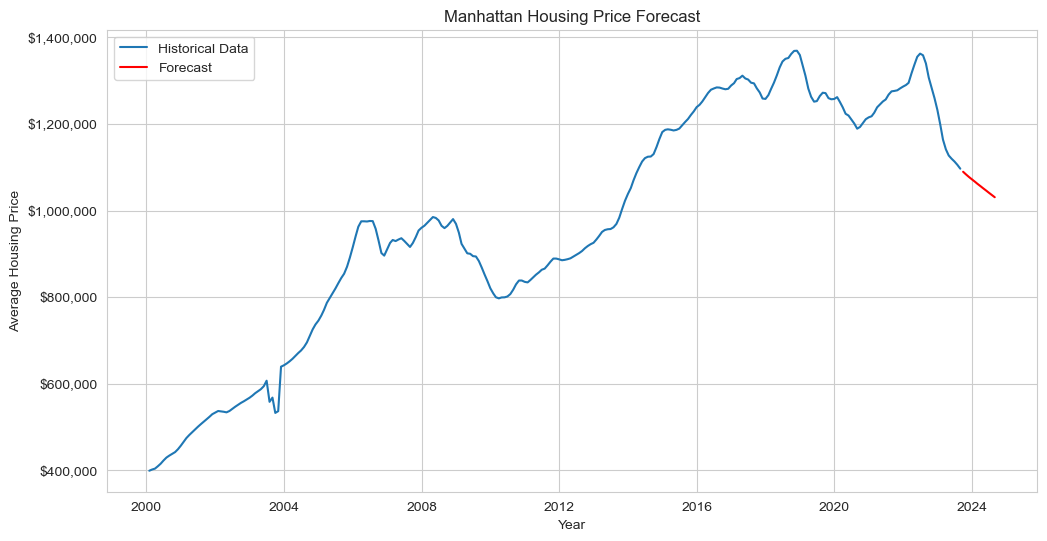

In [150]:
# Function to format the y-axis as dollar values
def dollar_formatter_full(x, pos):
    return '${:,.0f}'.format(x)

formatter_full = FuncFormatter(dollar_formatter_full)

# Visualizing the results with dollar-formatted y-axis
plt.figure(figsize=(12, 6))
plt.plot(manhattan_data, label='Historical Data')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.title('Manhattan Housing Price Forecast')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.gca().yaxis.set_major_formatter(formatter_full)
plt.legend()
plt.grid(True)
plt.show()

### Predictions for Queens

In [151]:
queens_diff = Queens_data.diff().dropna()
p_value_diff = check_stationarity(queens_diff)
p_value_diff

model = ARIMA(queens_diff, order=(1, 1, 1)) 
model_fit = model.fit()

# Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=queens_diff.index[-1], periods=13, freq='M')[1:]
forecast_values = forecast
last_known_value = Queens_data.iloc[-1]
forecast_values = forecast_values.cumsum() + last_known_value
formatted_forecast = forecast_values.apply(lambda x: "${:,.0f}".format(x))
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': formatted_forecast}).reset_index(drop=True)
forecast_df

/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,Date,Forecasted Price
0,2023-09-30,"$545,766"
1,2023-10-31,"$538,395"
2,2023-11-30,"$531,000"
3,2023-12-31,"$523,609"
4,2024-01-31,"$516,217"
5,2024-02-29,"$508,824"
6,2024-03-31,"$501,432"
7,2024-04-30,"$494,040"
8,2024-05-31,"$486,648"
9,2024-06-30,"$479,256"


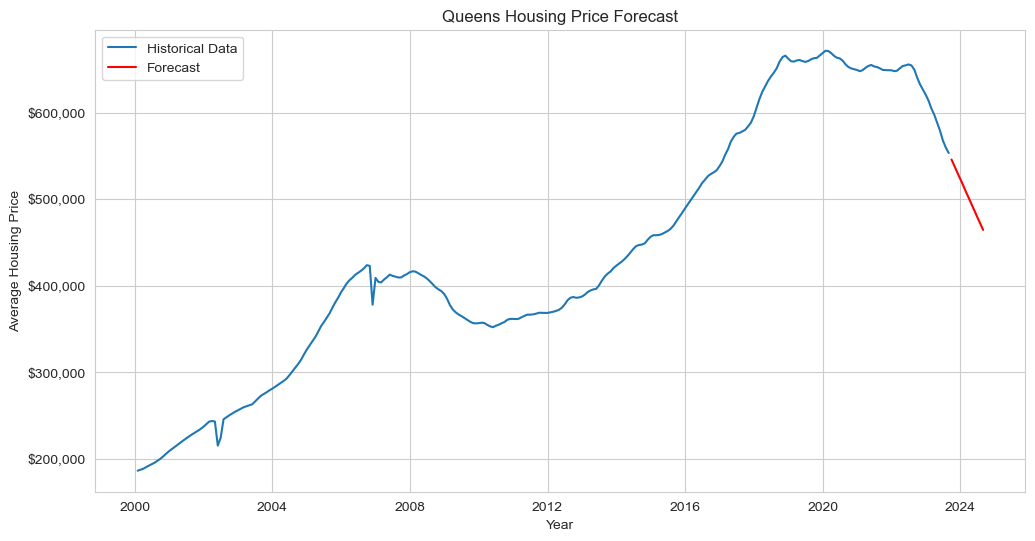

In [152]:
# Function to format the y-axis as dollar values
def dollar_formatter_full(x, pos):
    return '${:,.0f}'.format(x)

formatter_full = FuncFormatter(dollar_formatter_full)

# Visualizing the results with dollar-formatted y-axis
plt.figure(figsize=(12, 6))
plt.plot(Queens_data, label='Historical Data')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.title('Queens Housing Price Forecast')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.gca().yaxis.set_major_formatter(formatter_full)
plt.legend()
plt.grid(True)
plt.show()

### Predictions for Brooklyn 

In [153]:
brooklyn_diff = brooklyn_data.diff().dropna()
p_value_diff = check_stationarity(brooklyn_diff)
p_value_diff

model = ARIMA(brooklyn_diff, order=(1, 1, 1)) 
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=brooklyn_diff.index[-1], periods=13, freq='M')[1:]
forecast_values = forecast

last_known_value = brooklyn_data.iloc[-1]
forecast_values = forecast_values.cumsum() + last_known_value
formatted_forecast = forecast_values.apply(lambda x: "${:,.0f}".format(x))
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': formatted_forecast}).reset_index(drop=True)
forecast_df

/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/yashbhatia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,Date,Forecasted Price
0,2023-09-30,"$832,553"
1,2023-10-31,"$832,256"
2,2023-11-30,"$831,909"
3,2023-12-31,"$831,552"
4,2024-01-31,"$831,193"
5,2024-02-29,"$830,833"
6,2024-03-31,"$830,473"
7,2024-04-30,"$830,113"
8,2024-05-31,"$829,753"
9,2024-06-30,"$829,393"


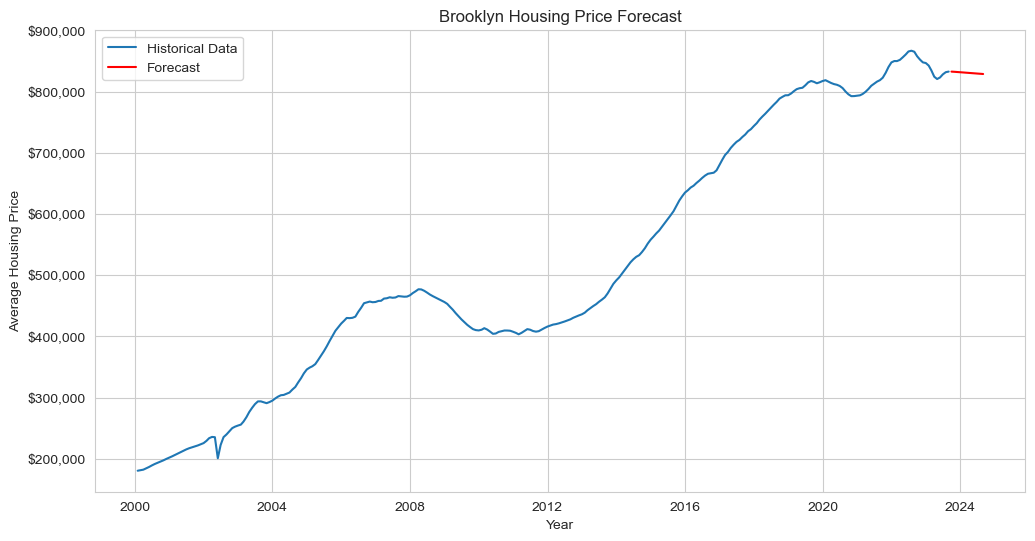

In [154]:
# Function to format the y-axis as dollar values
def dollar_formatter_full(x, pos):
    return '${:,.0f}'.format(x)

formatter_full = FuncFormatter(dollar_formatter_full)

# Visualizing the results with dollar-formatted y-axis
plt.figure(figsize=(12, 6))
plt.plot(brooklyn_data, label='Historical Data')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.title('Brooklyn Housing Price Forecast')
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.gca().yaxis.set_major_formatter(formatter_full)
plt.legend()
plt.grid(True)
plt.show()

Key Insights:

- The forecast suggests a gradual decrease in the average housing prices in Manhattan, Queens and Brooklyn over the next year (2024).

- The rate of decrease appears to be slowest for Brooklyn down over time, as the monthly decreases become smaller.

- By mid-2024, the prices seem to stabilize, with very slight decreases month-over-month.

- This could help a new investor since they would prefer investing in Brooklyn over in the next few months with least volatility from other boroughs in New York City. 


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
https://pyflux.readthedocs.io/en/latest/arima.html
https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
https://seaborn.pydata.org/generated/seaborn.heatmap.html

*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
